In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Library")



Library


In [2]:
# 2.1 Load Dataset

df_math = pd.read_csv('../Dataset/student-mat-id.csv', sep=';')
df_port = pd.read_csv('../Dataset/student-por-id.csv', sep=';')
print(f"   Math: {len(df_math)} siswa")
print(f"   Portuguese: {len(df_port)} siswa")


   Math: 395 siswa
   Portuguese: 649 siswa


In [3]:
## 2.2 Informasi Dataset

print("\n5 Baris Pertama:")
print(df_math.head())

print("\n5 Baris Pertama:")
print(df_port.head())



5 Baris Pertama:
           sekolah jenis_kelamin  usia tipe_alamat ukuran_keluarga  \
0  Gabriel Pereira     Perempuan    18   Perkotaan    Lebih dari 3   
1  Gabriel Pereira     Perempuan    17   Perkotaan    Lebih dari 3   
2  Gabriel Pereira     Perempuan    15   Perkotaan   3 atau kurang   
3  Gabriel Pereira     Perempuan    15   Perkotaan    Lebih dari 3   
4  Gabriel Pereira     Perempuan    16   Perkotaan    Lebih dari 3   

   status_orangtua  pendidikan_ibu  pendidikan_ayah     pekerjaan_ibu  \
0         Berpisah               4                4  Ibu rumah tangga   
1  Tinggal bersama               1                1  Ibu rumah tangga   
2  Tinggal bersama               1                1  Ibu rumah tangga   
3  Tinggal bersama               4                2         Kesehatan   
4  Tinggal bersama               3                3           Lainnya   

  pekerjaan_ayah  ... hubungan_keluarga waktu_luang  keluar_dengan_teman  \
0           Guru  ...                 4       

In [4]:
## 2.3 Gabungkan Dataset


df_math['subject'] = 'Math'
df_port['subject'] = 'Portuguese'

df = pd.concat([df_math, df_port], ignore_index=True)

print(f"\n✅ Dataset digabung: {len(df)} baris, {len(df.columns)} kolom")
print(f"   - Math: {len(df[df['subject']=='Math'])}")
print(f"   - Portuguese: {len(df[df['subject']=='Portuguese'])}")



✅ Dataset digabung: 1044 baris, 34 kolom
   - Math: 395
   - Portuguese: 649


In [5]:
## 2.4 Pemeriksaan Kualitas Data


# Missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Tidak ada missing values")
else:
    print("Missing values ditemukan:")
    print(missing[missing > 0])

# Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Baris duplikat: {duplicates}")
if duplicates == 0:
    print("✅ Tidak ada duplikat")

# Tipe data
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nKolom kategorikal: {len(cat_cols)}")
print(f"Kolom numerikal: {len(num_cols)}")


Tidak ada missing values

🔍 Baris duplikat: 0
✅ Tidak ada duplikat

Kolom kategorikal: 18
Kolom numerikal: 16


Target Variable: risiko_gagal
   Lulus (G3(Nilai Akhir) >= 10): 814 (78.0%)
   Gagal (G3(Nilai Akhir) < 10):  230 (22.0%)


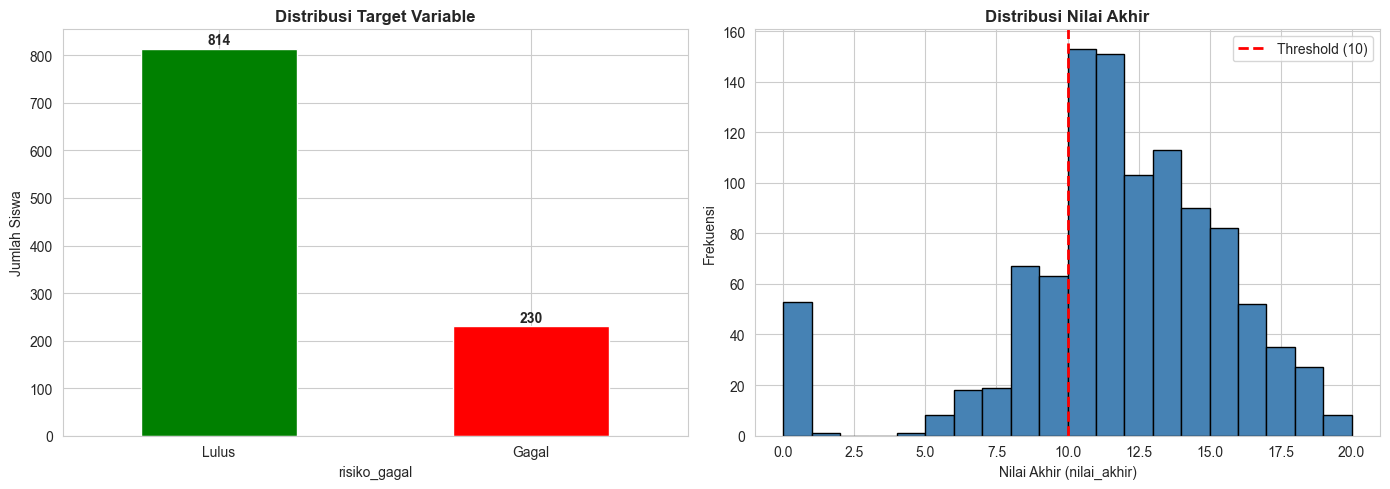

In [12]:
## 2.5 Analisis Target Variable

df['risiko_gagal'] = (df['nilai_akhir'] < 10).astype(int)

print("Target Variable: risiko_gagal")
print(f"   Lulus (G3(Nilai Akhir) >= 10): {(df['risiko_gagal']==0).sum()} ({(df['risiko_gagal']==0).mean()*100:.1f}%)")
print(f"   Gagal (G3(Nilai Akhir) < 10):  {(df['risiko_gagal']==1).sum()} ({(df['risiko_gagal']==1).mean()*100:.1f}%)")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['risiko_gagal'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_xticklabels(['Lulus', 'Gagal'], rotation=0)
axes[0].set_ylabel('Jumlah Siswa')
axes[0].set_title('Distribusi Target Variable', fontweight='bold')

for i, v in enumerate(df['risiko_gagal'].value_counts()):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

axes[1].hist(df['nilai_akhir'], bins=20, color='steelblue', edgecolor='black')
axes[1].axvline(x=10, color='red', linestyle='--', linewidth=2, label='Threshold (10)')
axes[1].set_xlabel('Nilai Akhir (nilai_akhir)')
axes[1].set_ylabel('Frekuensi')
axes[1].set_title('Distribusi Nilai Akhir', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


In [9]:
# ## 2.6 Statistik Deskriptif


print("Statistik Fitur Numerikal:")
print(df[num_cols].describe().T)

print("\nStatistik Fitur Kategorikal (Top 5):")
for col in cat_cols[:5]:
    print(f"\n{col}:")
    print(df[col].value_counts())


Statistik Fitur Numerikal:
                               count       mean       std   min   25%   50%  \
usia                          1044.0  16.726054  1.239975  15.0  16.0  17.0   
pendidikan_ibu                1044.0   2.603448  1.124907   0.0   2.0   3.0   
pendidikan_ayah               1044.0   2.387931  1.099938   0.0   1.0   2.0   
waktu_tempuh                  1044.0   1.522989  0.731727   1.0   1.0   1.0   
waktu_belajar                 1044.0   1.970307  0.834353   1.0   1.0   2.0   
jumlah_kegagalan              1044.0   0.264368  0.656142   0.0   0.0   0.0   
hubungan_keluarga             1044.0   3.935824  0.933401   1.0   4.0   4.0   
waktu_luang                   1044.0   3.201149  1.031507   1.0   3.0   3.0   
keluar_dengan_teman           1044.0   3.156130  1.152575   1.0   2.0   3.0   
konsumsi_alkohol_harian       1044.0   1.494253  0.911714   1.0   1.0   1.0   
konsumsi_alkohol_akhir_pekan  1044.0   2.284483  1.285105   1.0   1.0   2.0   
kesehatan                

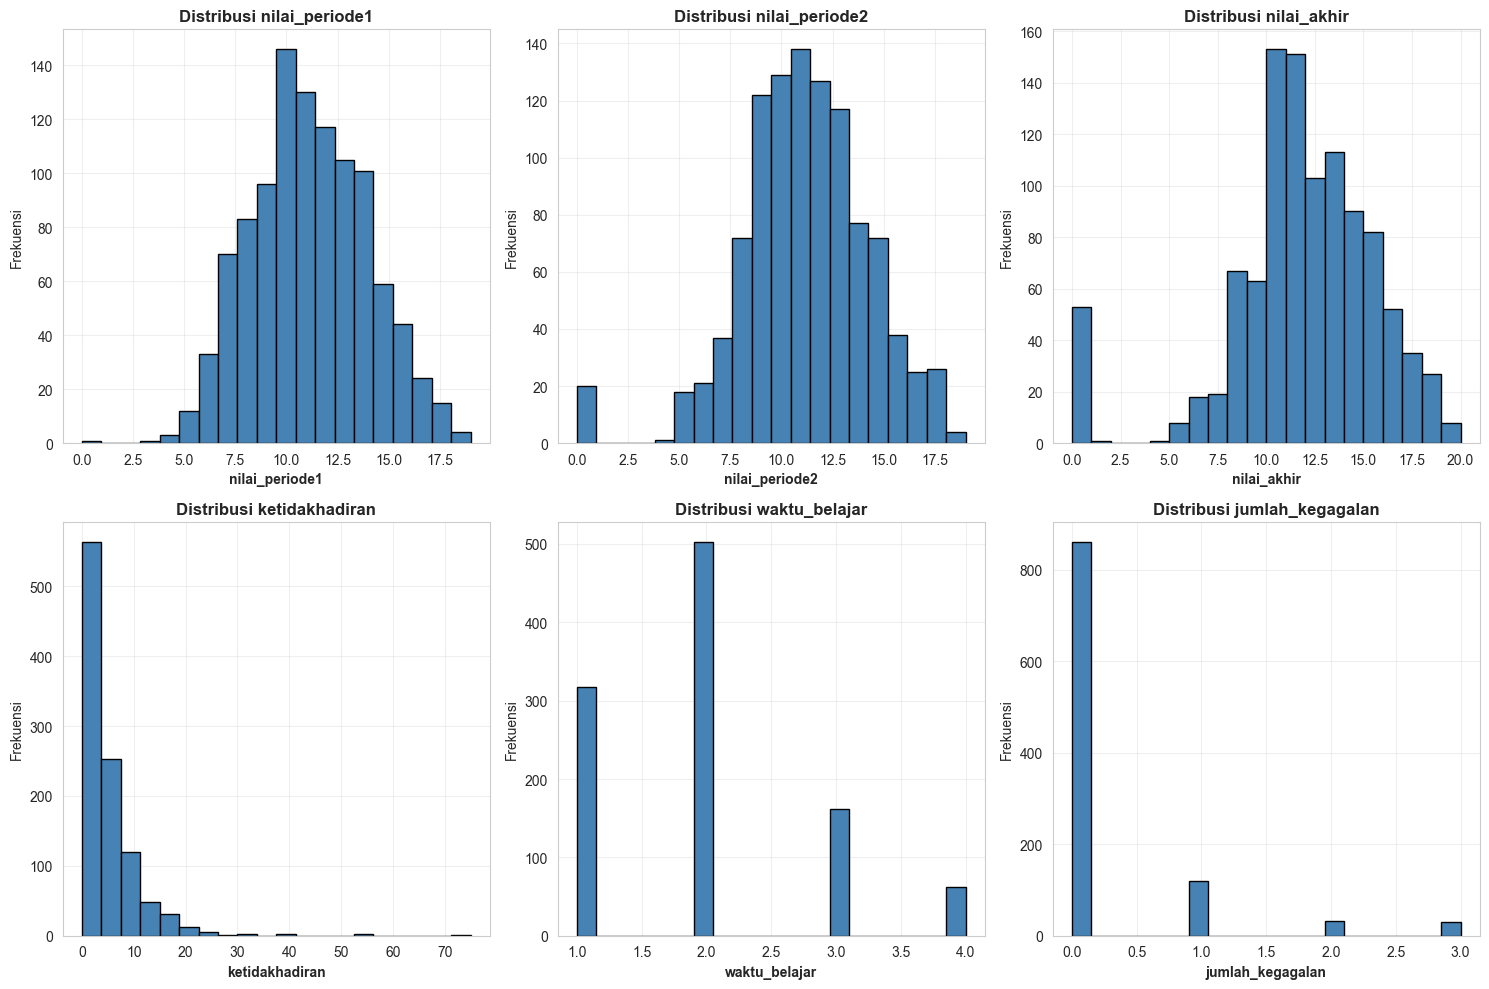

In [11]:
## 2.7 Distribusi Fitur Kunci

fiturKunci = ['nilai_periode1', 'nilai_periode2', 'nilai_akhir', 'ketidakhadiran', 'waktu_belajar', 'jumlah_kegagalan']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(fiturKunci):
    axes[i].hist(df[col], bins=20, color='steelblue', edgecolor='black')
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Distribusi {col}', fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


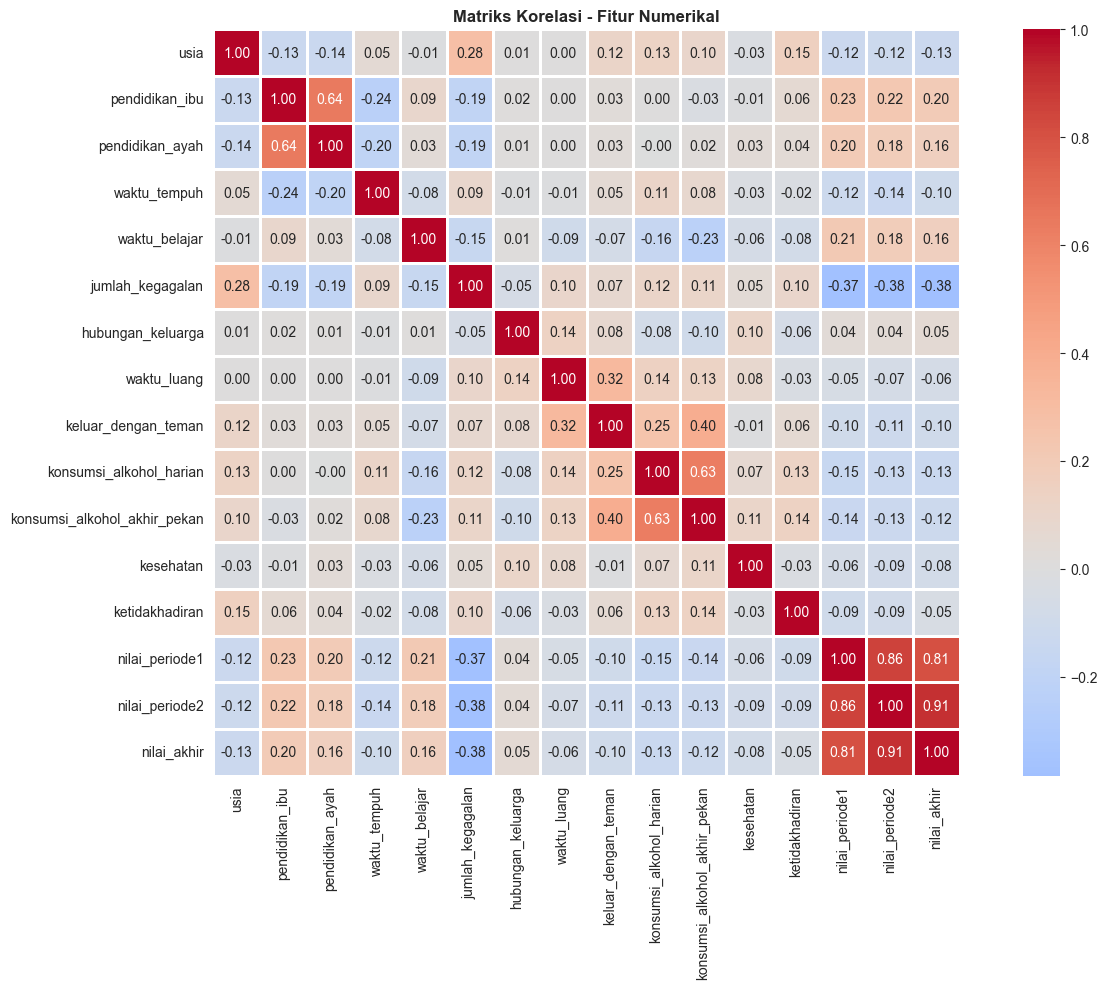


🔗 Top 10 Korelasi dengan nilai_akhir (Nilai Akhir):
nilai_akhir          1.000000
nilai_periode2       0.910743
nilai_periode1       0.809142
pendidikan_ibu       0.201472
waktu_belajar        0.161629
pendidikan_ayah      0.159796
hubungan_keluarga    0.054461
ketidakhadiran      -0.045671
waktu_luang         -0.064890
kesehatan           -0.080079
Name: nilai_akhir, dtype: float64


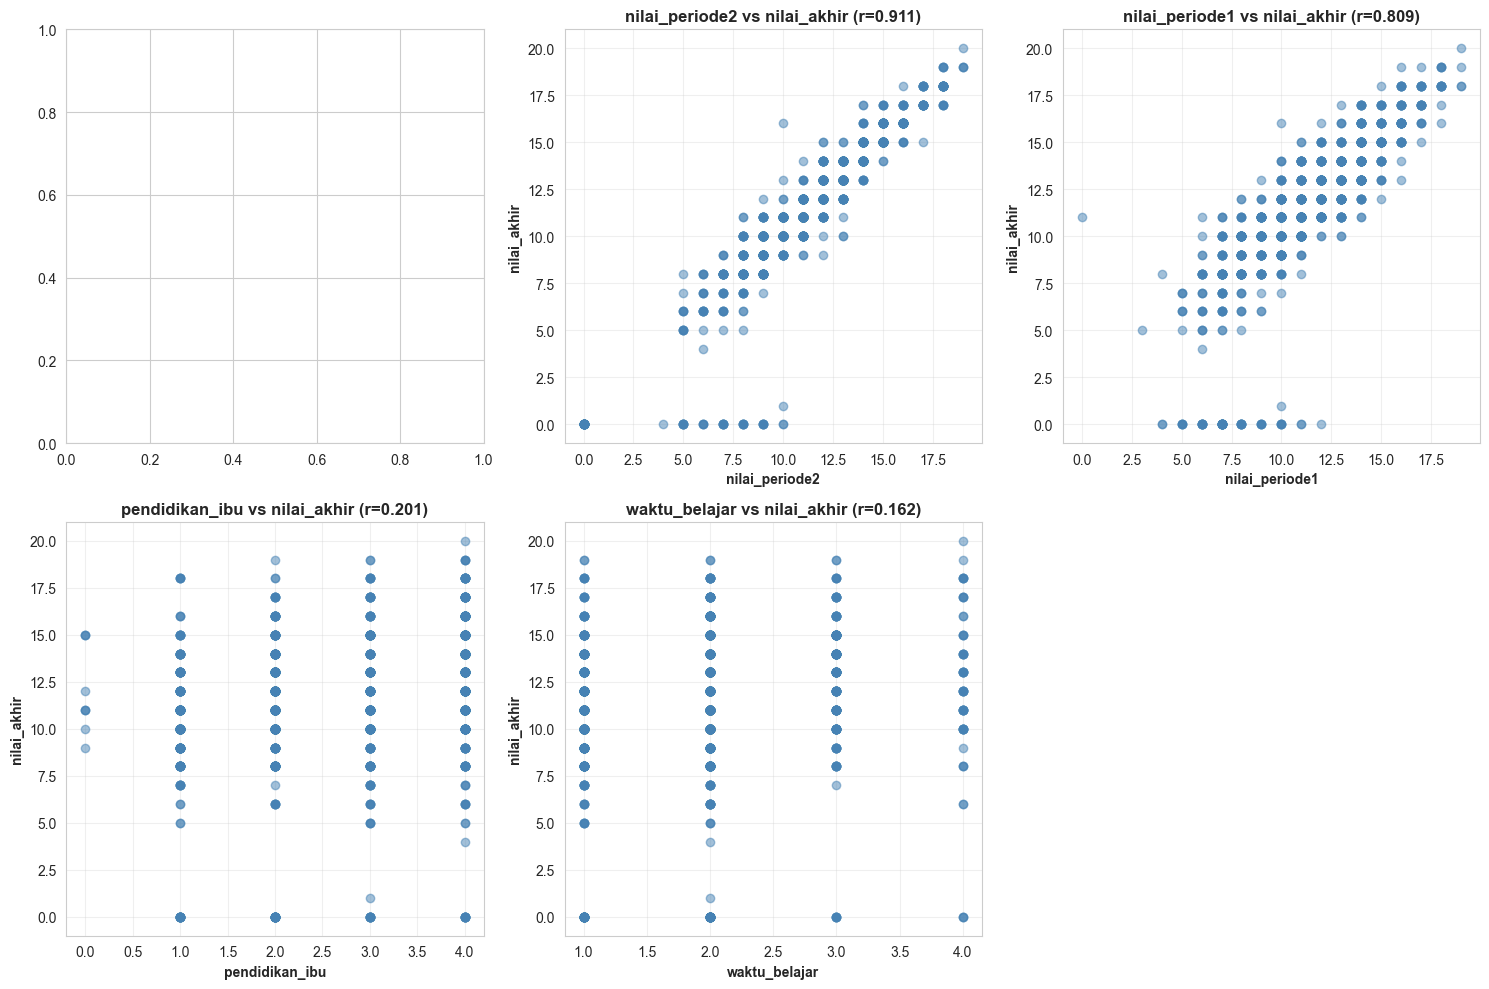

In [13]:
 ## 2.8 Analisis Korelasi
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matriks Korelasi - Fitur Numerikal', fontweight='bold')
plt.tight_layout()
plt.show()

nilai_akhir_corr = corr_matrix['nilai_akhir'].sort_values(ascending=False)
print("\n🔗 Top 10 Korelasi dengan nilai_akhir (Nilai Akhir):")
print(nilai_akhir_corr.head(10))

top_features = nilai_akhir_corr.head(6).index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(top_features):
    if col != 'nilai_akhir':
        axes[i].scatter(df[col], df['nilai_akhir'], alpha=0.5, color='steelblue')
        axes[i].set_xlabel(col, fontweight='bold')
        axes[i].set_ylabel('nilai_akhir', fontweight='bold')
        axes[i].set_title(f'{col} vs nilai_akhir (r={nilai_akhir_corr[col]:.3f})', fontweight='bold')
        axes[i].grid(alpha=0.3)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


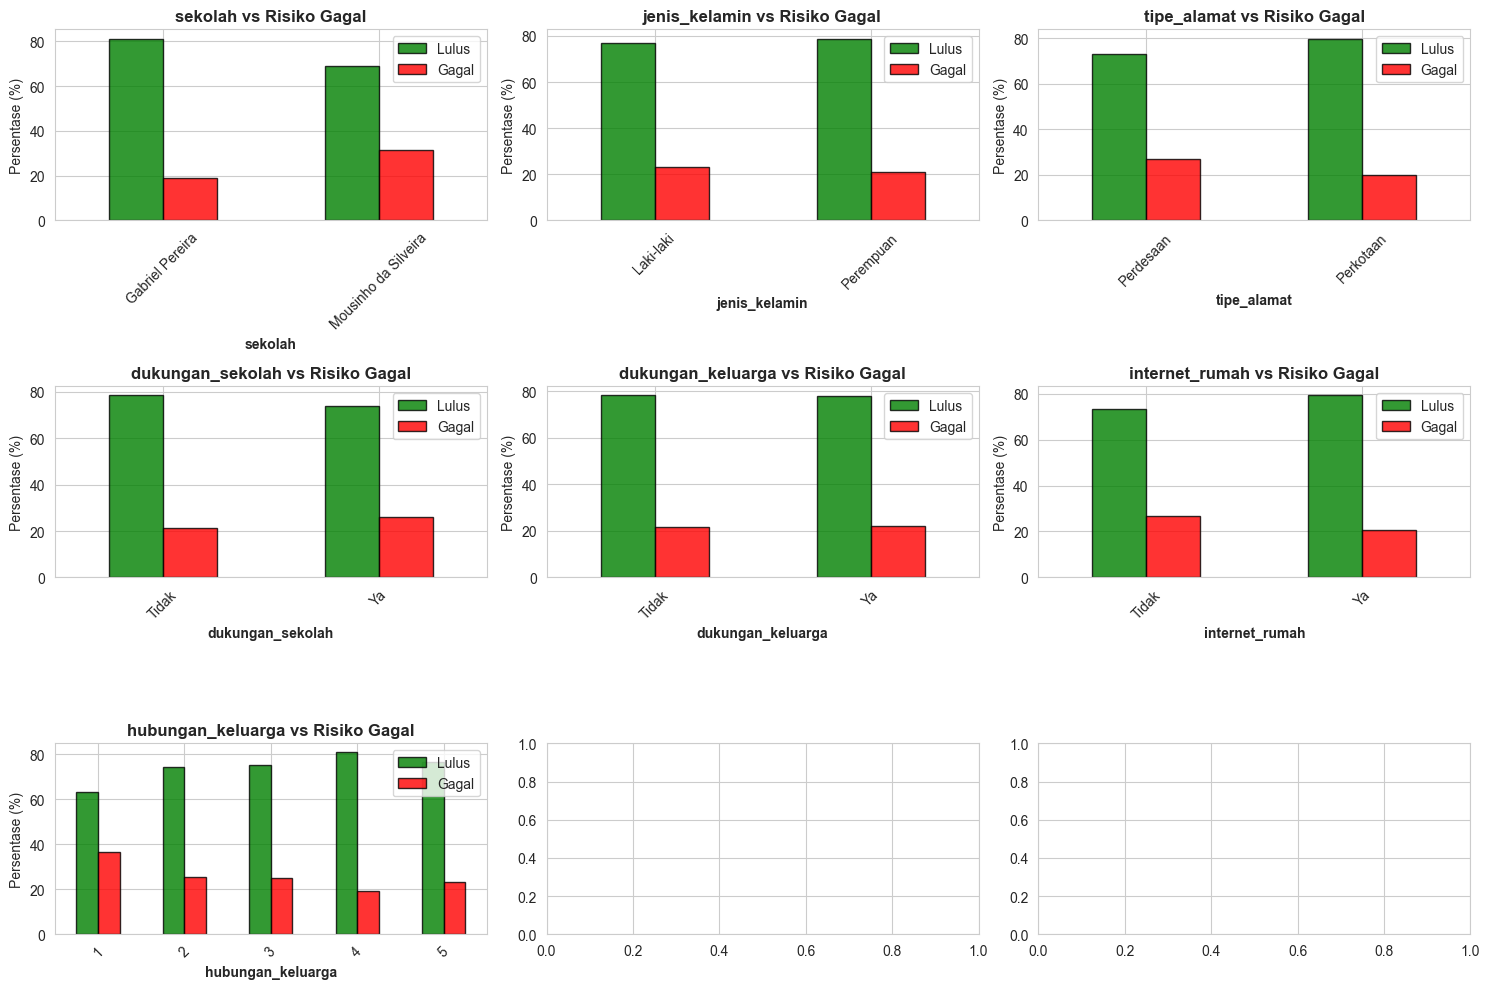

In [ ]:
## 2.9 Fitur Kategorikal vs Target

cat_features = ['sekolah', 'jenis_kelamin', 'tipe_alamat', 'dukungan_sekolah' ,'dukungan_keluarga', 'internet_rumah', 'hubungan_keluarga','ketidakhadiran','konsumsi_alkohol_akhir_pekan']


fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(cat_features):
    ct = pd.crosstab(df[col], df['risiko_gagal'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], color=['green', 'red'], 
            edgecolor='black', alpha=0.8)
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Persentase (%)')
    axes[i].set_title(f'{col} vs Risiko Gagal', fontweight='bold')
    axes[i].legend(['Lulus', 'Gagal'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


⚖️ Analisis Fairness Baseline:

JENIS_KELAMIN:
----------------------------------------
Tingkat kegagalan:
jenis_kelamin
Laki-laki    23.178808
Perempuan    21.150592
Name: risiko_gagal, dtype: float64

Gap: 2.03%
✅ Fair (gap < 5%)

TIPE_ALAMAT:
----------------------------------------
Tingkat kegagalan:
tipe_alamat
Perdesaan    27.017544
Perkotaan    20.158103
Name: risiko_gagal, dtype: float64

Gap: 6.86%
Perhatian sedang (gap 5-10%)


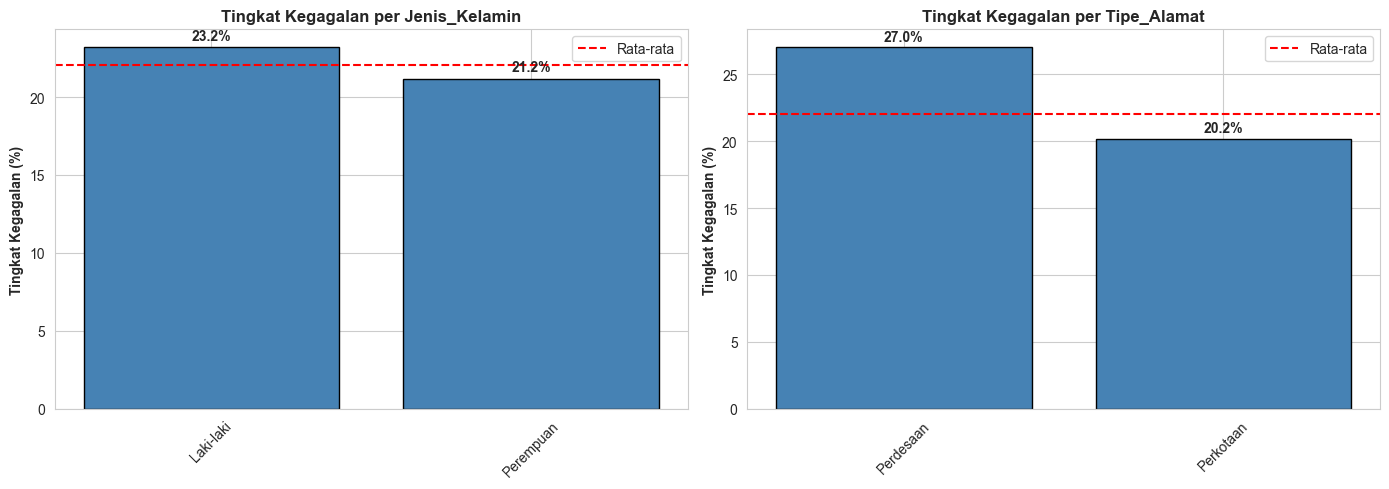

In [20]:
## 2.10 Analisis Fairness Baseline

sensitive_attrs = ['jenis_kelamin', 'tipe_alamat']

print("⚖️ Analisis Fairness Baseline:")
print("="*60)

for attr in sensitive_attrs:
    print(f"\n{attr.upper()}:")
    print("-"*40)
    
    failure_rate = df.groupby(attr)['risiko_gagal'].mean() * 100
    print("Tingkat kegagalan:")
    print(failure_rate)
    
    gap = failure_rate.max() - failure_rate.min()
    print(f"\nGap: {gap:.2f}%")
    
    if gap < 5:
        print("✅ Fair (gap < 5%)")
    elif gap < 10:
        print("Perhatian sedang (gap 5-10%)")
    else:
        print("Bias signifikan (gap > 10%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, attr in enumerate(sensitive_attrs):
    failure_rate = df.groupby(attr)['risiko_gagal'].mean() * 100
    bars = axes[i].bar(range(len(failure_rate)), failure_rate.values, 
                       color='steelblue', edgecolor='black')
    axes[i].set_xticks(range(len(failure_rate)))
    axes[i].set_xticklabels(failure_rate.index, rotation=45)
    axes[i].set_ylabel('Tingkat Kegagalan (%)', fontweight='bold')
    axes[i].set_title(f'Tingkat Kegagalan per {attr.title()}', fontweight='bold')
    axes[i].axhline(y=df['risiko_gagal'].mean()*100, color='red', 
                    linestyle='--', label='Rata-rata')
    axes[i].legend()
    
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


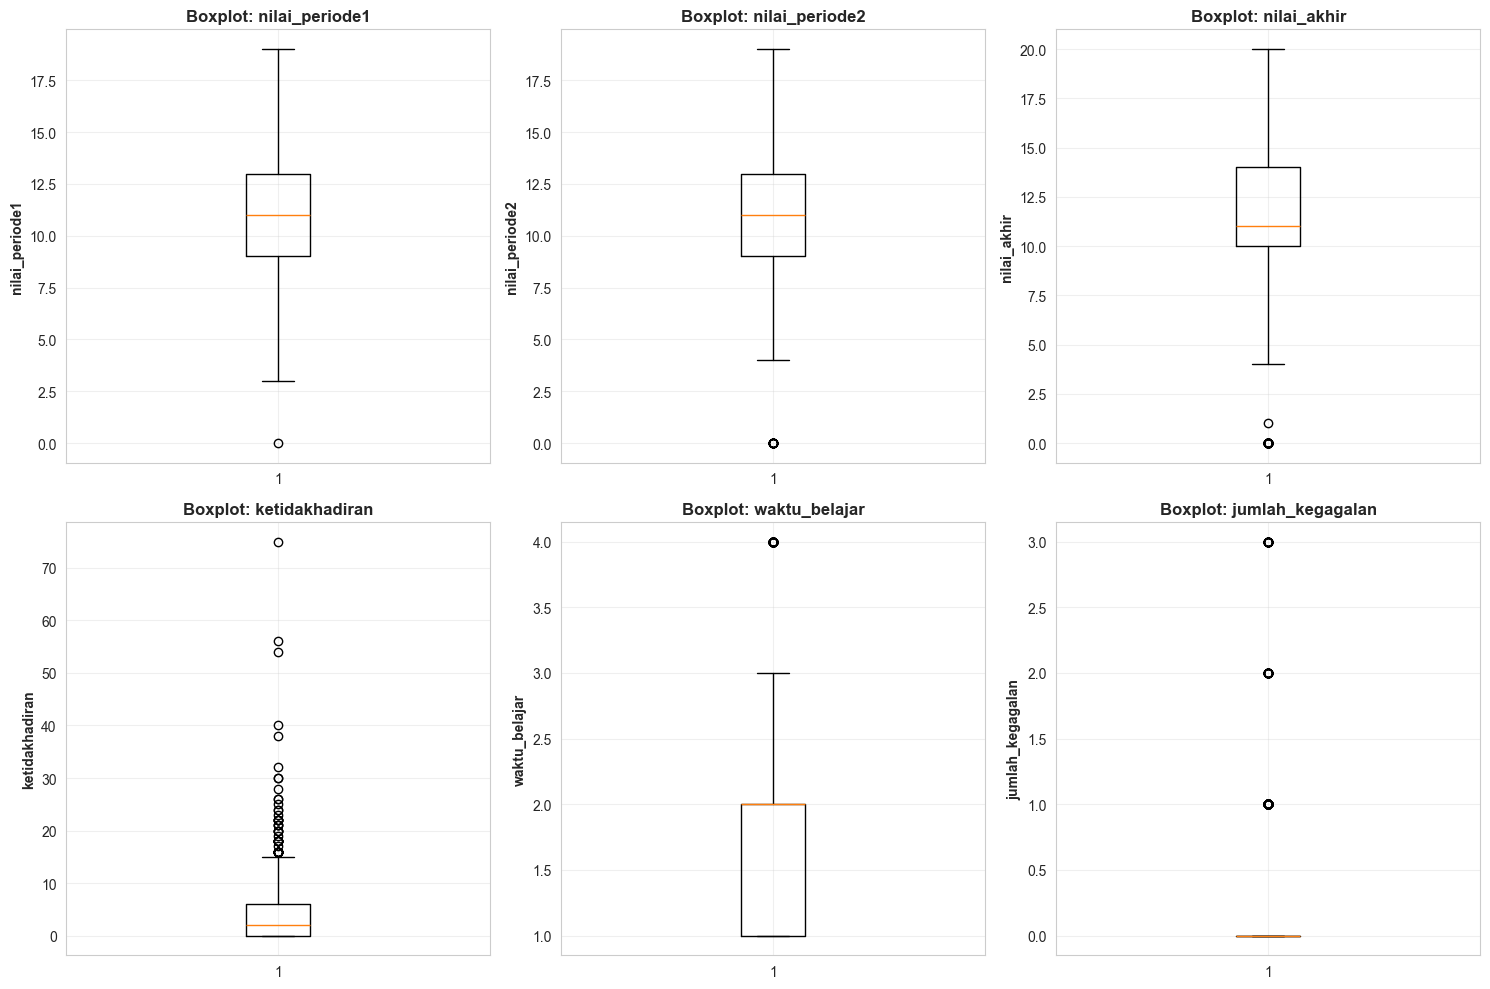

🔍 Deteksi Outlier (Metode IQR):

nilai_periode1:
  Range: [0, 19]
  IQR bounds: [3.00, 19.00]
  Outliers: 1 (0.1%)

nilai_periode2:
  Range: [0, 19]
  IQR bounds: [3.00, 19.00]
  Outliers: 20 (1.9%)

nilai_akhir:
  Range: [0, 20]
  IQR bounds: [4.00, 20.00]
  Outliers: 54 (5.2%)

ketidakhadiran:
  Range: [0, 75]
  IQR bounds: [-9.00, 15.00]
  Outliers: 54 (5.2%)

waktu_belajar:
  Range: [1, 4]
  IQR bounds: [-0.50, 3.50]
  Outliers: 62 (5.9%)

jumlah_kegagalan:
  Range: [0, 3]
  IQR bounds: [0.00, 0.00]
  Outliers: 183 (17.5%)


In [21]:
## 2.11 Deteksi Outlier


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(fiturKunci):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_ylabel(col, fontweight='bold')
    axes[i].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


print("🔍 Deteksi Outlier (Metode IQR):")
print("="*60)

for col in fiturKunci:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Range: [{df[col].min()}, {df[col].max()}]")
    print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")


In [ ]:
## 2.12 Simpan Dataset Gabungan

output_path = '../Dataset/DataGabungan.csv'
df.to_csv(output_path, index=False)
print(f"Dataset tersimpan: {output_path}")
